In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [531]:
df = pd.read_csv('data-kiem-tra-2.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550038 entries, 0 to 550037
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      550038 non-null  object 
 1   truong_1  550038 non-null  int64  
 2   truong_2  550038 non-null  int64  
 3   truong_3  550038 non-null  int64  
 4   truong_4  550038 non-null  float64
 5   truong_5  550038 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 25.2+ MB
None


,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1


In [532]:
# df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df_gop = df.groupby('date').mean().reset_index()
len(df_gop['date'])

# lưu data gộp vào file data_kiem_tra_gop.csv
# df_gop.to_csv('data-kiem-tra-gop.csv', index=False)

214

<h1>Tiền xử lý và Trực quan hóa</h1>

In [533]:
df = pd.read_csv('data-kiem-tra-gop.csv')
# df.drop('Unnamed: 0', inplace=True, axis=1)
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,01.05.2013,4.0,29.304022,10275.341513,593.006905,1.114519
1,01.06.2013,5.0,34.736084,10306.830386,623.678839,1.251692
2,01.07.2013,6.0,33.036860,10493.618771,686.657065,1.157338
3,01.08.2013,7.0,32.863878,10262.245658,624.383078,1.140730
4,01.09.2013,8.0,33.842278,9937.449262,620.668734,1.274666
...,...,...,...,...,...,...
209,30.11.2013,10.0,29.607930,10968.565639,913.830837,1.340969
210,31.05.2013,4.0,31.046650,10158.323155,664.273523,1.142494
211,31.07.2013,6.0,33.123320,10735.476815,603.719067,1.146841
212,31.08.2013,7.0,34.225264,10107.528158,685.890704,1.255329


Trực quan hóa cột truong_1

<Axes: ylabel='truong_1'>

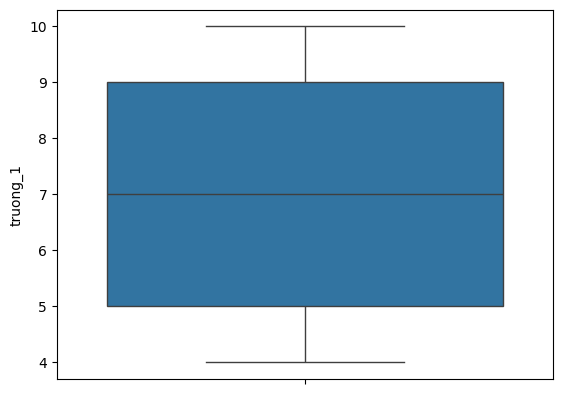

In [534]:
sns.boxplot(y='truong_1', data=df)

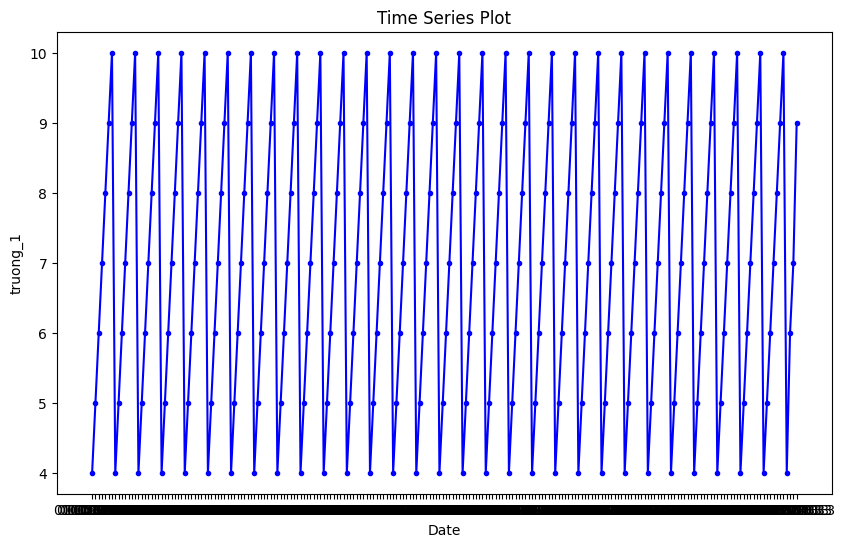

In [535]:
# Vẽ biểu đồ time series
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df['date'], df['truong_1'], color='blue', marker='.', linestyle='-')  # Điểm dữ liệu có mặt marker và nối đường

# Đặt tên cho trục và tiêu đề của biểu đồ
plt.xlabel('Date')
plt.ylabel('truong_1')
plt.title('Time Series Plot')

# Hiển thị biểu đồ
plt.show()

vì cột truong_1 không có giá trị ngoại lai nên qua cột số 2

<Axes: ylabel='truong_2'>

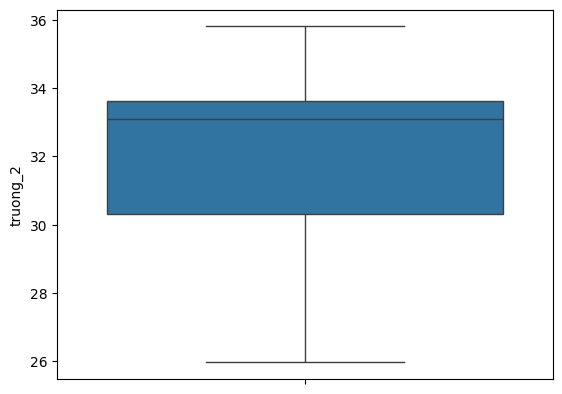

In [536]:
sns.boxplot(y='truong_2', data=df)

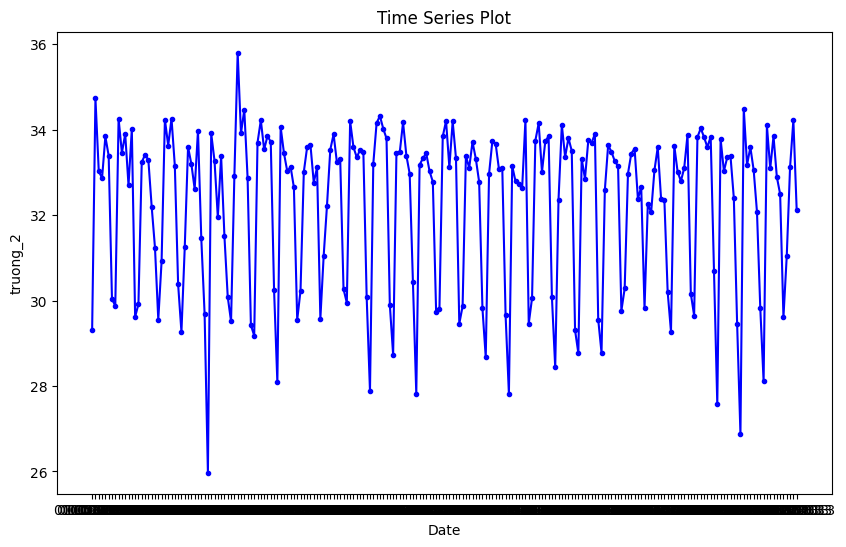

In [537]:
# Vẽ biểu đồ time series
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df['date'], df['truong_2'], color='blue', marker='.', linestyle='-')  # Điểm dữ liệu có mặt marker và nối đường

# Đặt tên cho trục và tiêu đề của biểu đồ
plt.xlabel('Date')
plt.ylabel('truong_2')
plt.title('Time Series Plot')

# Hiển thị biểu đồ
plt.show()

vì cột truong_3 có giá trị ngoại lai nên ra xử lý bằng cách đứa giá trị lớn hơn max về max, giá trị nhỏ hơn min về min

<Axes: ylabel='truong_3'>

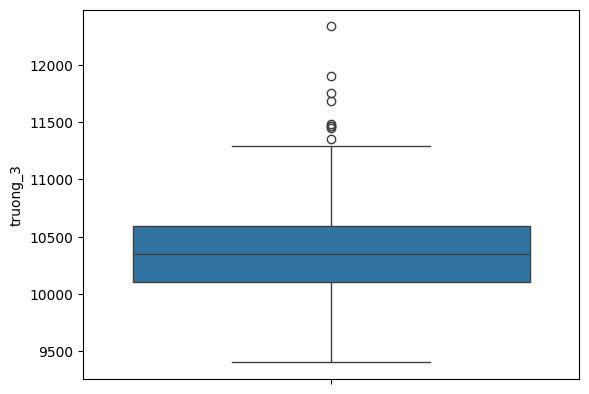

In [538]:
sns.boxplot(y='truong_3', data=df)

Biểu đồ time series trước tiền xử lý

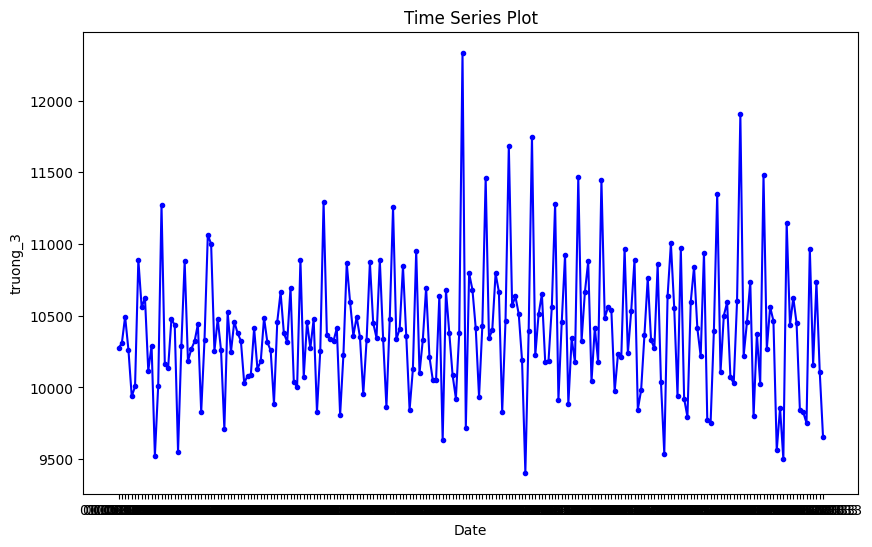

In [539]:
# Vẽ biểu đồ time series
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df['date'], df['truong_3'], color='blue', marker='.', linestyle='-')  # Điểm dữ liệu có mặt marker và nối đường

# Đặt tên cho trục và tiêu đề của biểu đồ
plt.xlabel('Date')
plt.ylabel('truong_3')
plt.title('Time Series Plot')

# Hiển thị biểu đồ
plt.show()

In [540]:
IQR1 = df["truong_3"].quantile(0.75) - df['truong_3'].quantile(0.25)

lower_Quantity_limit = df["truong_3"].quantile(0.25) - (IQR1 * 1.5)
upper_Quantity_limit = df["truong_3"].quantile(0.75) + (IQR1 * 1.5)

print(lower_Quantity_limit)
print(upper_Quantity_limit)

9372.644743032743
11331.935370225878


In [541]:
df["truong_3"]= np.where(df["truong_3"] > upper_Quantity_limit, upper_Quantity_limit,
            np.where(df["truong_3"] < lower_Quantity_limit, lower_Quantity_limit, df["truong_3"]))

cột truong_3 sau khi xử lý

<Axes: ylabel='truong_3'>

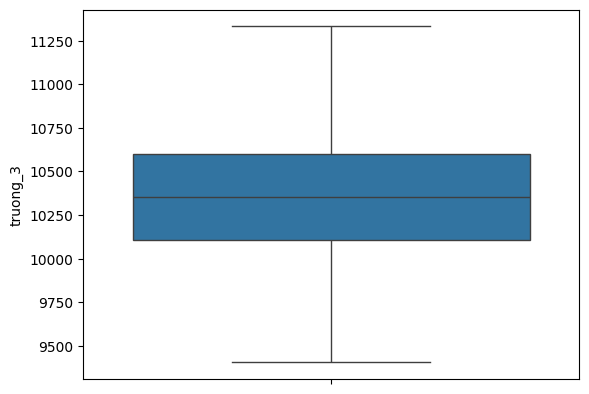

In [542]:
sns.boxplot(y='truong_3', data=df)

Biểu đồ time series sau tiền xử lý

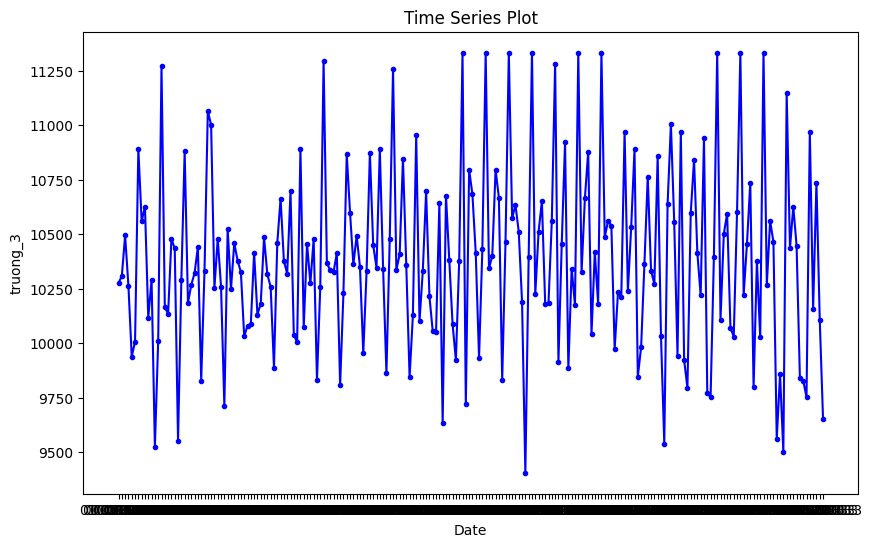

In [543]:
# Vẽ biểu đồ time series
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df['date'], df['truong_3'], color='blue', marker='.', linestyle='-')  # Điểm dữ liệu có mặt marker và nối đường

# Đặt tên cho trục và tiêu đề của biểu đồ
plt.xlabel('Date')
plt.ylabel('truong_3')
plt.title('Time Series Plot')

# Hiển thị biểu đồ
plt.show()

cột truong_4

<Axes: ylabel='truong_4'>

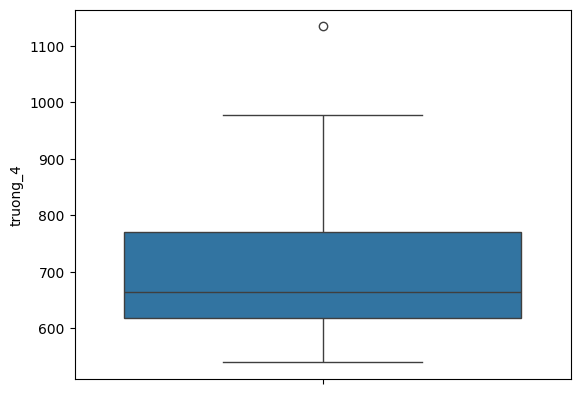

In [544]:
sns.boxplot(y='truong_4', data=df)

Biểu đồ time series trước tiền xử lý

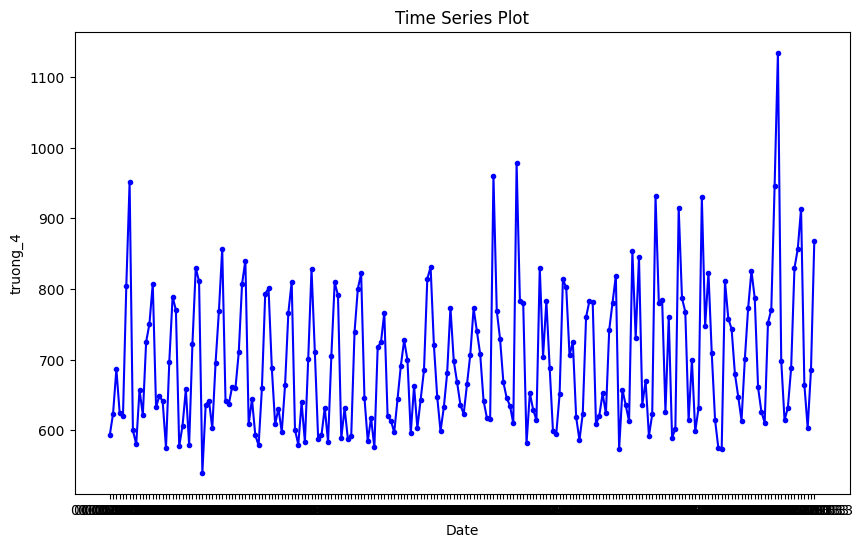

In [545]:
# Vẽ biểu đồ time series
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df['date'], df['truong_4'], color='blue', marker='.', linestyle='-')  # Điểm dữ liệu có mặt marker và nối đường

# Đặt tên cho trục và tiêu đề của biểu đồ
plt.xlabel('Date')
plt.ylabel('truong_4')
plt.title('Time Series Plot')

# Hiển thị biểu đồ
plt.show()

In [546]:
IQR1 = df["truong_4"].quantile(0.75) - df['truong_4'].quantile(0.25)

lower_Quantity_limit = df["truong_4"].quantile(0.25) - (IQR1 * 1.5)
upper_Quantity_limit = df["truong_4"].quantile(0.75) + (IQR1 * 1.5)

print(lower_Quantity_limit)
print(upper_Quantity_limit)

391.23119961481996
996.81766090191


In [547]:
df["truong_4"]= np.where(df["truong_4"] > upper_Quantity_limit, upper_Quantity_limit,
            np.where(df["truong_4"] < lower_Quantity_limit, lower_Quantity_limit, df["truong_4"]))

<Axes: ylabel='truong_4'>

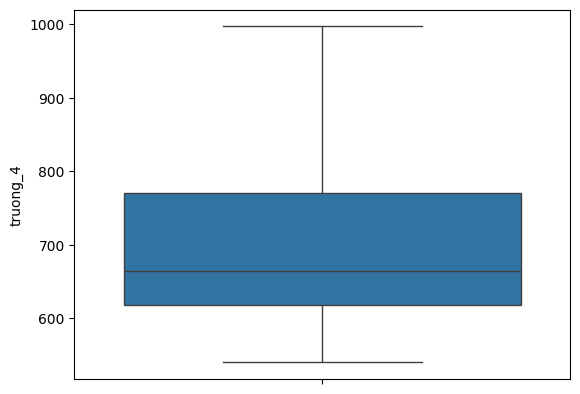

In [548]:
sns.boxplot(y='truong_4', data=df)

Biểu đồ time series sau tiền xử lý

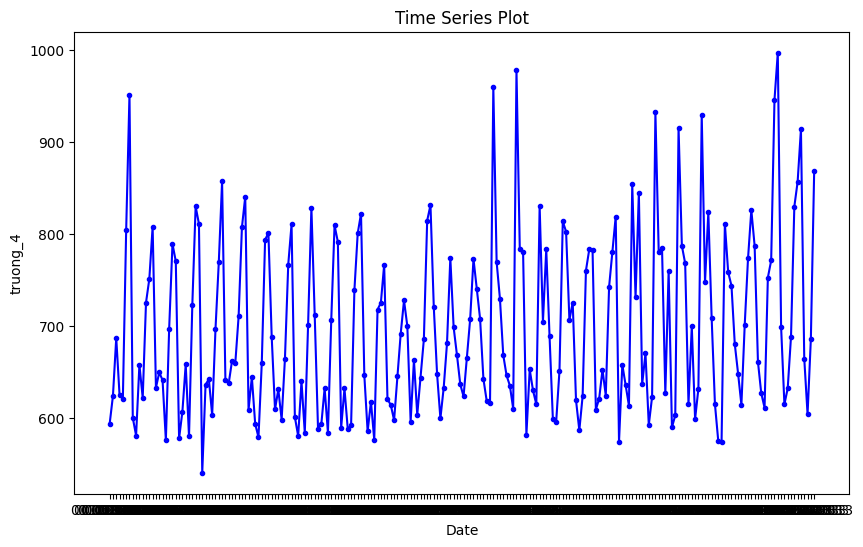

In [549]:
# Vẽ biểu đồ time series
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df['date'], df['truong_4'], color='blue', marker='.', linestyle='-')  # Điểm dữ liệu có mặt marker và nối đường

# Đặt tên cho trục và tiêu đề của biểu đồ
plt.xlabel('Date')
plt.ylabel('truong_4')
plt.title('Time Series Plot')

# Hiển thị biểu đồ
plt.show()

cột truong_5

<Axes: ylabel='truong_5'>

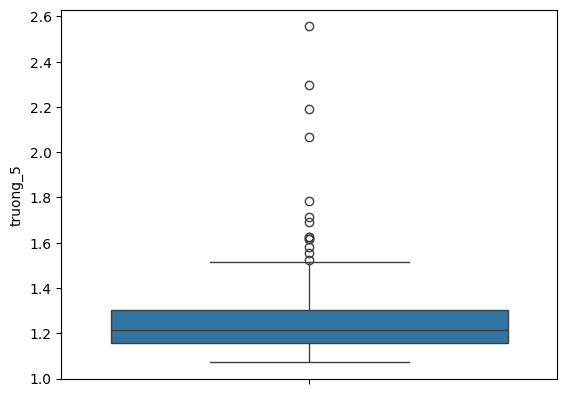

In [550]:
sns.boxplot(y='truong_5', data=df)

biểu đồ time srries trước tiền xử lý

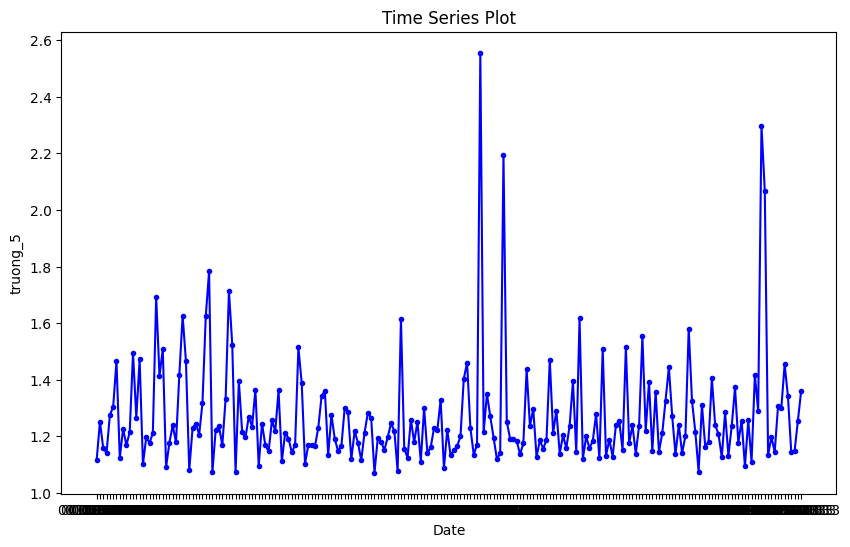

In [551]:
# Vẽ biểu đồ time series
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df['date'], df['truong_5'], color='blue', marker='.', linestyle='-')  # Điểm dữ liệu có mặt marker và nối đường

# Đặt tên cho trục và tiêu đề của biểu đồ
plt.xlabel('Date')
plt.ylabel('truong_5')
plt.title('Time Series Plot')

# Hiển thị biểu đồ
plt.show()

In [552]:
IQR1 = df["truong_5"].quantile(0.75) - df['truong_5'].quantile(0.25)

lower_Quantity_limit = df["truong_5"].quantile(0.25) - (IQR1 * 1.5)
upper_Quantity_limit = df["truong_5"].quantile(0.75) + (IQR1 * 1.5)

print(lower_Quantity_limit)
print(upper_Quantity_limit)

0.9392591268814318
1.5179488369837588


In [553]:
df["truong_5"]= np.where(df["truong_5"] > upper_Quantity_limit, upper_Quantity_limit,
            np.where(df["truong_5"] < lower_Quantity_limit, lower_Quantity_limit, df["truong_5"]))

<Axes: ylabel='truong_5'>

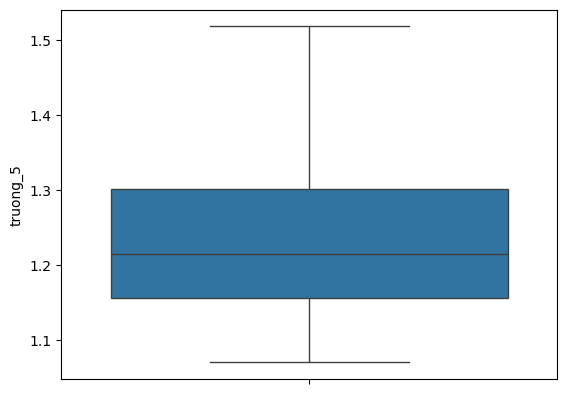

In [554]:
sns.boxplot(y='truong_5', data=df)

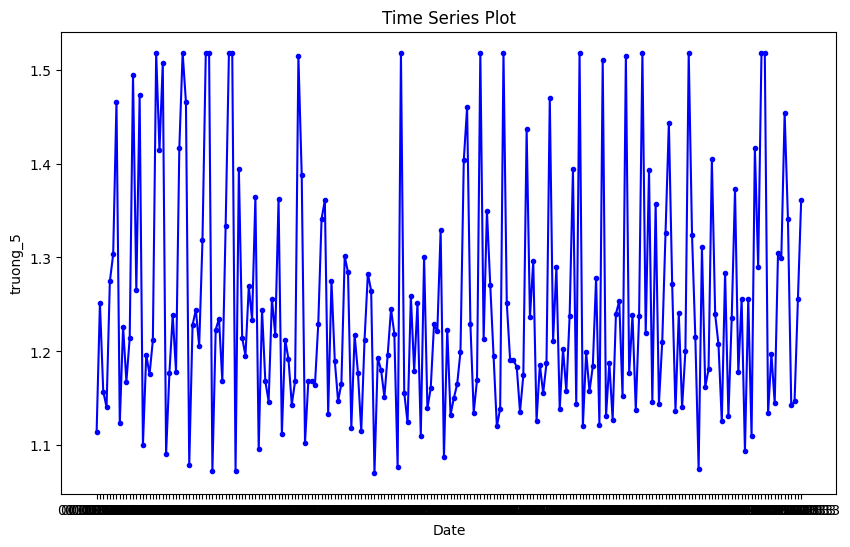

In [555]:
# Vẽ biểu đồ time series
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ
plt.plot(df['date'], df['truong_5'], color='blue', marker='.', linestyle='-')  # Điểm dữ liệu có mặt marker và nối đường

# Đặt tên cho trục và tiêu đề của biểu đồ
plt.xlabel('Date')
plt.ylabel('truong_5')
plt.title('Time Series Plot')

# Hiển thị biểu đồ
plt.show()

<h1>Mô hình ARIMA</h1>

In [556]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools

In [557]:
# Chọn phạm vi cho p, d, q
p = range(0, 3)  # Số lượng lag cho phần autoregressive (AR)
d = range(0, 2)  # Số lượng lần sai phân
q = range(0, 3)  # Số lượng lag cho phần moving average (MA)

# Tạo danh sách tất cả các tổ hợp của p, d, q
pdq = list(itertools.product(p, d, q))

# Lặp qua tất cả các tổ hợp để tìm ra bộ tham số tốt nhất
best_score, best_params = float("inf"), None
for param in pdq:
    try:
        model = ARIMA(df['truong_3'], order=param)
        result = model.fit()
        # Đánh giá mô hình sử dụng AIC
        if result.aic < best_score:
            best_score, best_params = result.aic, param
    except:
        continue

print("Best AIC:", best_score)
print("Best Parameters:", best_params)

Best AIC: 3168.308837798416
Best Parameters: (1, 0, 2)


In [558]:
model = ARIMA(df['truong_3'], order=best_params)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               truong_3   No. Observations:                  214
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1579.154
Date:                Tue, 04 Jun 2024   AIC                           3168.309
Time:                        12:14:28   BIC                           3185.139
Sample:                             0   HQIC                          3175.110
                                - 214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.038e+04     19.508    532.182      0.000    1.03e+04    1.04e+04
ar.L1         -0.6355      0.084     -7.593      0.000      -0.800      -0.471
ma.L1          0.5539      0.094      5.899      0.000       0.370       0.738
ma.L2         -0.3859      0.076     -5.062      0.000      -0.535      -0.236
sigma2      1.495e+05   1.45e+04     10.306      0.000    1.21e+05    1.78e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.63   Prob(JB):                         0.99
Heteroskedasticity (H):               1.79   Skew:                            -0.02
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [559]:
forecast_values = result.forecast(steps=15)
forecast_values

214    10797.688009
215    10281.441243
216    10445.302914
217    10341.171878
218    10407.345209
219    10365.293291
220    10392.016501
221    10375.034400
222    10385.826208
223    10378.968215
224    10383.326342
225    10380.556834
226    10382.316804
227    10381.198376
228    10381.909116
Name: predicted_mean, dtype: float64

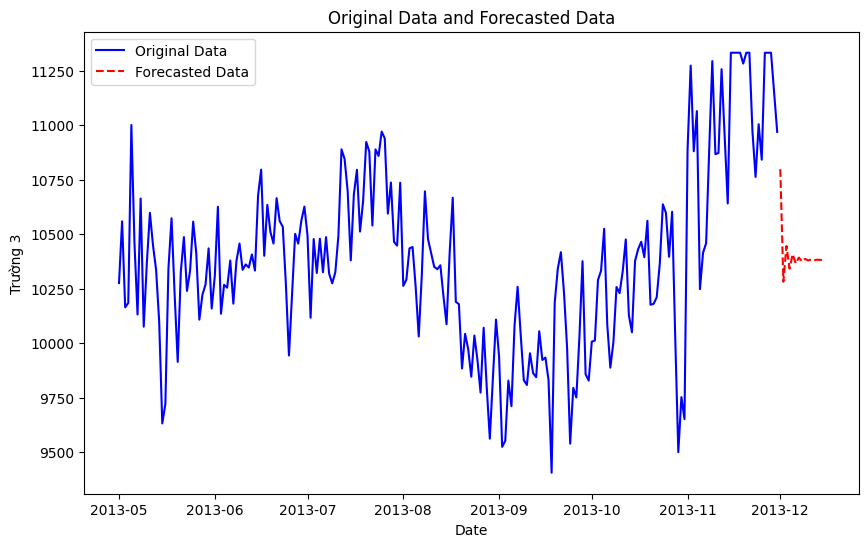

In [560]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

df = df.sort_values(by='date')

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['truong_3'], color='blue', label='Original Data')
plt.plot(pd.date_range(start=df['date'].iloc[-1], periods=16)[1:], forecast_values, color='red', linestyle='--', label='Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Trường 3')
plt.title('Original Data and Forecasted Data')
plt.legend()
plt.show()

<h1>Mô hình Garch</h1>

In [561]:
from arch import arch_model
from sklearn.model_selection import ParameterGrid

In [566]:
params_grid = {'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'q': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Khởi tạo biến lưu trữ kết quả tốt nhất và tham số tương ứng
best_aic = np.inf
best_params = None

# Lặp qua tất cả các tổ hợp của tham số p và q
for params in ParameterGrid(params_grid):
    try:
        # Xây dựng mô hình GARCH với các tham số đã chọn
        model = arch_model(df['truong_3'], vol='GARCH', p=params['p'], q=params['q'])
        result = model.fit(disp='off')
        
        # Lưu kết quả tốt nhất
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = params
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.722e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.722e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\ASUS\AppD

Best AIC: 3105.6995737631896
Best Parameters: {'p': 1, 'q': 2}


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.722e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [567]:
model = arch_model(df['truong_3'], vol='GARCH', p=best_params['p'], q=best_params['q'])
result = model.fit(disp='off')
result.summary()

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.722e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               truong_3   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1547.85
Distribution:                  Normal   AIC:                           3105.70
Method:            Maximum Likelihood   BIC:                           3122.53
                                        No. Observations:                  214
Date:                Tue, Jun 04 2024   Df Residuals:                      213
Time:                        12:15:31   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0371e+04     23.658    438.380      0.000 [1.032e+04,1.042e+04]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.6713e+04   8665.954      1.929  5.378e-02 [-2.715e+02,3.370e+04]
alpha[1]       0.6463      0.196      3.292  9.950e-04      [  0.262,  1.031]
beta[1]        0.0331  8.887e-02      0.372      0.710      [ -0.141,  0.207]
beta[2]        0.2800      0.133      2.110  3.484e-02    [1.994e-02,  0.540]
=============================================================================

Covariance estimator: robust
"""

In [568]:
forecast_values = result.forecast(horizon=15)
forecast_values = forecast_values

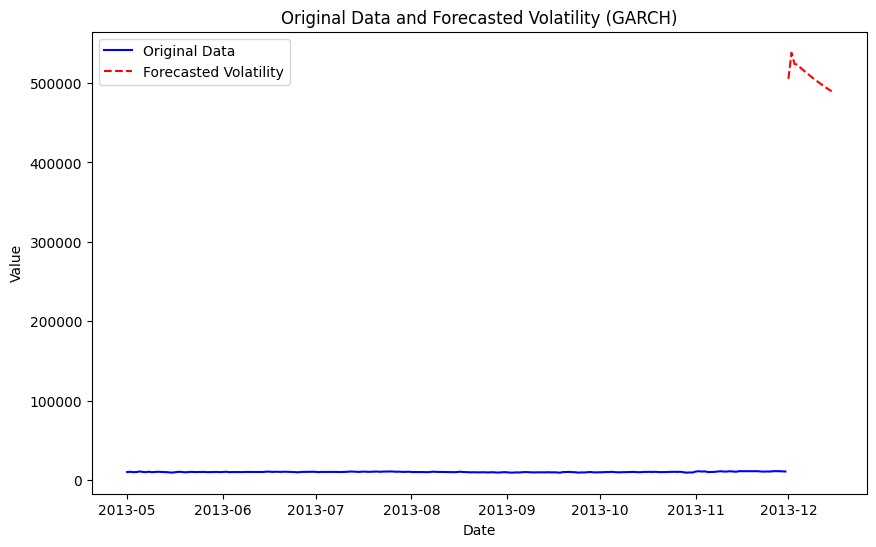

In [569]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['truong_3'], color='blue', label='Original Data')
plt.plot(pd.date_range(start=df['date'].iloc[-1], periods=16)[1:], forecast_values.variance.iloc[-1, :], color='red', linestyle='--', label='Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data and Forecasted Volatility (GARCH)')
plt.legend()
plt.show()